In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Prospect_Park_without_night.csv to Prospect_Park_without_night.csv


In [ ]:
# import packages
import numpy as np
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
import datetime as dt
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from scipy import stats

# suppress warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
Xtable = pd.read_csv("Prospect_Park_without_night.csv")
Xtable

,Date,Month,Time,Visits,Shaded_Area_Minimal,Shaded_Area_Partial,Shaded_Area_Fully,Water_Area,non_water_area,Weekday,...,non_windy,Large_Event,Small_Event,non_event,Athletic_Zone,Entrance_Zone,Lakeside_Zone,Meadows_Zone,Trail_Zone,Villa_Green_Zone
0,2024/4/1,4,6,3.323272,1,0,0,0,1,1,...,1,0,0,1,1,0,0,0,0,0
1,2024/4/1,4,7,9.554407,1,0,0,0,1,1,...,1,0,0,1,1,0,0,0,0,0
2,2024/4/1,4,8,61.669354,1,0,0,0,1,1,...,1,0,0,1,1,0,0,0,0,0
3,2024/4/1,4,9,72.394459,1,0,0,0,1,1,...,1,0,0,1,1,0,0,0,0,0
4,2024/4/1,4,10,68.504721,1,0,0,0,1,1,...,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17467,2024/9/29,9,17,216.258223,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
17468,2024/9/29,9,18,163.688303,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
17469,2024/9/29,9,19,131.940193,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
17470,2024/9/29,9,20,98.130519,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1


In [ ]:
Xtable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17472 entries, 0 to 17471
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 17472 non-null  object 
 1   Month                17472 non-null  int64  
 2   Time                 17472 non-null  int64  
 3   Visits               17472 non-null  float64
 4   Shaded_Area_Minimal  17472 non-null  int64  
 5   Shaded_Area_Partial  17472 non-null  int64  
 6   Shaded_Area_Fully    17472 non-null  int64  
 7   Water_Area           17472 non-null  int64  
 8   non_water_area       17472 non-null  int64  
 9   Weekday              17472 non-null  int64  
 10  Weekend              17472 non-null  int64  
 11  Summer               17472 non-null  int64  
 12  non_summer           17472 non-null  int64  
 13  Morning              17472 non-null  int64  
 14  Afternoon            17472 non-null  int64  
 15  Evening              17472 non-null 

In [ ]:
Xtable.columns

Index(['Date', 'Month', 'Time', 'Visits', 'Shaded_Area_Minimal',
       'Shaded_Area_Partial', 'Shaded_Area_Fully', 'Water_Area',
       'non_water_area', 'Weekday', 'Weekend', 'Summer', 'non_summer',
       'Morning', 'Afternoon', 'Evening', 'Extreme', 'Hot', 'Average', 'Cool',
       'Clear', 'Cloudy', 'Rainy', 'Windy', 'non_windy', 'Large_Event',
       'Small_Event', 'non_event', 'Athletic_Zone', 'Entrance_Zone',
       'Lakeside_Zone', 'Meadows_Zone', 'Trail_Zone', 'Villa_Green_Zone'],
      dtype='object')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF
vif_data = pd.DataFrame()

selected_columns_vif = [
    'Weekend',
    'Shaded_Area_Partial',
    'Shaded_Area_Fully',
    'non_water_area',
    'Summer',
    'Evening',
    'Morning',
    'Extreme',
    'Hot',
    'Cool',
    'Rainy',
    'Cloudy',
    'Windy',
    'Large_Event',
    'Small_Event'
]
vif_data["feature"] = selected_columns_vif
vif_data["VIF"] = [variance_inflation_factor(Xtable[selected_columns_vif].values, i) for i in range(len(selected_columns_vif))]
print(vif_data)

                feature       VIF
0               Weekend  1.462139
1   Shaded_Area_Partial  1.525299
2     Shaded_Area_Fully  2.369131
3        non_water_area  2.369186
4                Summer  2.050913
5               Evening  1.718659
6               Morning  2.140588
7               Extreme  1.064980
8                   Hot  1.178612
9                  Cool  4.085187
10                Rainy  1.247524
11               Cloudy  2.653164
12                Windy  1.041300
13          Large_Event  1.010277
14          Small_Event  1.023305


In [ ]:
from re import X
# Select desired columns from Xtable1
selected_columns_ols = [
    'Weekend',
    'Shaded_Area_Partial',
    'Shaded_Area_Fully',
    'non_water_area',
    'Summer',
    'Evening',
    'Morning',
    'Extreme',
    'Hot',
    'Cool',
    'Rainy',
    'Cloudy',
    'Windy',
    'Large_Event',
    'Small_Event'
]

# Create formula string
formula = 'Visits ~ ' + ' + '.join(selected_columns_ols)+ ' + Extreme:Shaded_Area_Partial'+ ' + Hot:Shaded_Area_Partial'+ ' + Cool:Shaded_Area_Partial'+ ' + Extreme:Shaded_Area_Fully'+ ' + Hot:Shaded_Area_Fully'+ ' + Cool:Shaded_Area_Fully'+ ' + Extreme:non_water_area'+ ' + Hot:non_water_area'+ ' + Cool:non_water_area'
# Fit the OLS model
T1m = smf.ols(formula=formula, data=Xtable).fit()
T1m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Visits   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     476.9
Date:                Wed, 16 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:54:44   Log-Likelihood:            -1.3359e+05
No. Observations:               17472   AIC:                         2.672e+05
Df Residuals:                   17447   BIC:                         2.674e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     673.8912     21.090     31.953      0.000     632.552     715.230
Weekend                       462.1430      8.435     54.791      0.000     445.610     478.676
Shaded_Area_Partial           -78.2208     28.360     -2.758      0.006    -133.810     -22.632
Shaded_Area_Fully            -439.7131     20.052    -21.929      0.000    -479.017    -400.409
non_water_area                307.1885     20.058     15.315      0.000     267.873     346.504
Summer                        155.2456      8.878     17.487      0.000     137.844     172.647
Evening                       -55.9921     10.173     -5.504      0.000     -75.933     -36.051
Morning                      -472.8824      9.281    -50.951      0.000    -491.074    -454.690
Extreme                      -235.9241     67.884     -3.475      0.001    -368.983    -102.865
Hot                          -173.9371     42.473     -4.095      0.000    -257.188     -90.686
Cool                         -168.3647     21.217     -7.935      0.000    -209.952    -126.777
Rainy                        -266.9362     15.685    -17.019      0.000    -297.679    -236.193
Cloudy                        -69.3405      8.557     -8.103      0.000     -86.113     -52.568
Windy                         -63.1648     22.245     -2.840      0.005    -106.767     -19.563
Large_Event                  1897.6718     64.676     29.341      0.000    1770.901    2024.443
Small_Event                  1317.0797     57.759     22.803      0.000    1203.866    1430.293
Extreme:Shaded_Area_Partial  -102.0982    105.061     -0.972      0.331    -308.029     103.833
Hot:Shaded_Area_Partial        10.4654     65.762      0.159      0.874    -118.435     139.366
Cool:Shaded_Area_Partial       54.0503     31.692      1.705      0.088      -8.069     116.170
Extreme:Shaded_Area_Fully      90.8682     74.275      1.223      0.221     -54.719     236.455
Hot:Shaded_Area_Fully         125.9748     46.493      2.710      0.007      34.845     217.105
Cool:Shaded_Area_Fully        126.6211     22.407      5.651      0.000      82.701     170.541
Extreme:non_water_area       -182.8611     74.270     -2.462      0.014    -328.438     -37.284
Hot:non_water_area           -156.1546     46.488     -3.359      0.001    -247.275     -65.034
Cool:non_water_area           -60.7214     22.410     -2.710      0.007    -104.648     -16.795
==============================================================================
Omnibus:                    13546.756   Durbin-Watson:                   0.282
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           479116.958
Skew:                           3.429   Prob(JB):                         0.00
Kurtosis:                      27.720   Cond. No.                         63.0


In [ ]:
coef_df = pd.DataFrame({
    "Variable": T1m.params.index,  # Get the variable names from the model
    "Coefficient": T1m.params.values,  # Get the coefficients
    "Lower CI": T1m.conf_int()[0].values,  # Lower bound of the confidence interval
    "Upper CI": T1m.conf_int()[1].values   # Upper bound of the confidence interval
})

print(coef_df)

               Variable  Coefficient     Lower CI     Upper CI
0             Intercept   895.705321   865.577098   925.833544
1               Weekend   462.230718   445.680749   478.780687
2   Shaded_Area_Partial   -38.474152   -62.605082   -14.343222
3     Shaded_Area_Fully  -337.437860  -354.501639  -320.374081
4            Water_Area  -252.024720  -269.093018  -234.956423
5                Summer   155.313841   137.894127   172.733556
6               Evening   -55.987611   -75.949308   -36.025914
7               Morning  -472.881795  -491.092982  -454.670609
8               Extreme  -298.806166  -363.446829  -234.165503
9                   Hot  -187.200437  -227.589662  -146.811211
10                 Cool  -126.395073  -148.704302  -104.085844
11                Rainy  -266.946227  -297.721898  -236.170556
12               Cloudy   -69.378411   -86.168678   -52.588143
13                Windy   -63.191033  -106.839224   -19.542842
14          Large_Event  1900.795695  1773.937399  2027

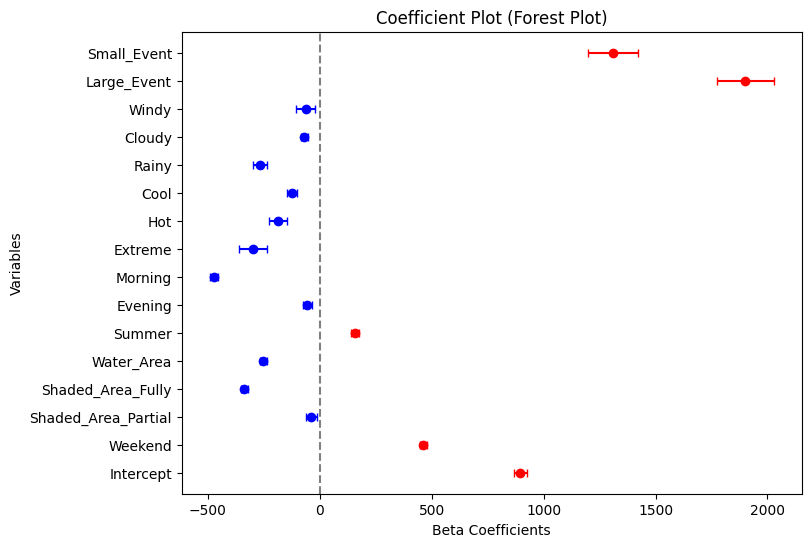

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out the intercept (if needed)
coef_df = coef_df[coef_df["Variable"] != "const"]

plt.figure(figsize=(8, 6))

# Loop over each variable and manually draw error bars in different colors
for i, row in coef_df.iterrows():
    lower_bound = row["Lower CI"]
    upper_bound = row["Upper CI"]

    # Determine color:
    if lower_bound > 0:  # Entirely on the positive side
        color = "red"
    elif upper_bound < 0:  # Entirely on the negative side
        color = "blue"
    else:  # Error bar crosses the zero axis
        color = "black"

    plt.errorbar(
        row["Coefficient"], row["Variable"],
        xerr=[[row["Coefficient"] - row["Lower CI"]], [row["Upper CI"] - row["Coefficient"]]],
        fmt='o', color=color, capsize=3
    )

# Add a vertical reference line at zero
plt.axvline(x=0, linestyle="--", color="gray")

plt.xlabel("Beta Coefficients")
plt.ylabel("Variables")
plt.title("Coefficient Plot (Forest Plot)")
plt.show()